In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
titanic = pd.read_csv("./data/titanic.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.dtypes

In [12]:
titanic.to_excel('./data/titanic.xlsx',sheet_name="passengers",index=False)

In [16]:
titanic = pd.read_excel("./data/titanic.xlsx",sheet_name="passengers")

In [ ]:
titanic.info()

In [19]:
# ავიღოთ titanic df-დან Age Column და განვათავსოთ ages ცვლადში.
ages = titanic['Age']

In [ ]:
titanic[['Age','Sex']]

In [24]:
type(titanic[['Age','Sex']])

pandas.core.frame.DataFrame

Filter DataFrame Rows


In [30]:
# აბრუნებს მხოლოდ Boolean ტიპს არის თუ არა პირობა ჭეშმარიტი თითოეულ მონაცემზე
titanic['Age']>35
above_35 = titanic[titanic['Age']>35]

In [42]:
# isin ამოწმებს მასში გადაცემულ list-ში მყოფი ელემენტები არსებობს თუ არა Pclass-ში
class_23 = titanic[titanic['Pclass'].isin([2,3])]

In [46]:
age_no_na = titanic[titanic['Age'].notna()]
age_no_na.shape

(714, 12)

Select Specific rows & Columns

In [54]:
adult_names = titanic.loc[titanic['Age']>35,"Name"]

In [ ]:
titanic.iloc[9:25,2:5]

In [64]:
titanic.iloc[0:3,3] = "Anonymous"

### Create Plots

In [70]:
air_quality = pd.read_csv('./data/air_quality_no2.csv')
air_quality.head()

,datetime,station_antwerp,station_paris,station_london
0,2019-05-07 02:00:00,NaN,NaN,23.0
1,2019-05-07 03:00:00,50.5,25.0,19.0
2,2019-05-07 04:00:00,45.0,27.7,19.0
3,2019-05-07 05:00:00,NaN,50.4,16.0
4,2019-05-07 06:00:00,NaN,61.9,NaN


<Axes: >

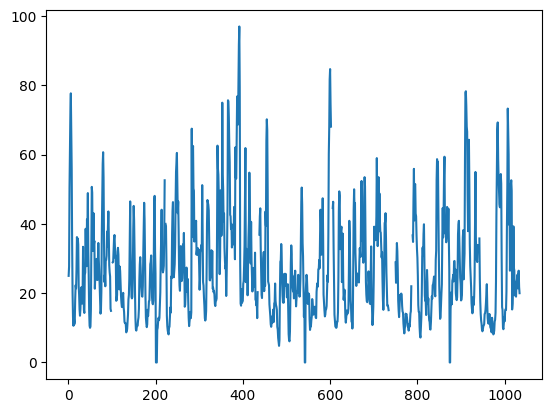

In [72]:
air_quality['station_paris'].plot()

<Axes: xlabel='station_london', ylabel='station_paris'>

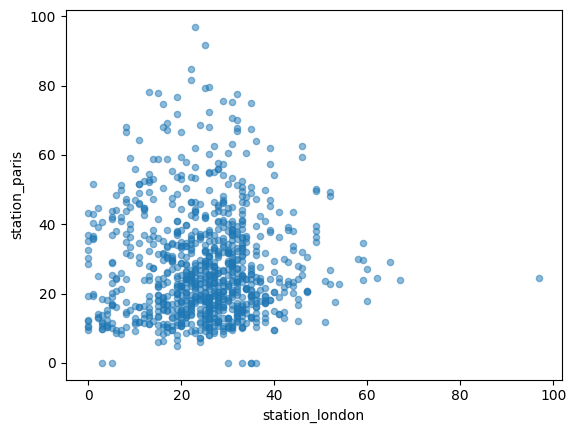

In [73]:
air_quality.plot.scatter(x="station_london",y="station_paris",alpha=0.5)

<Axes: >

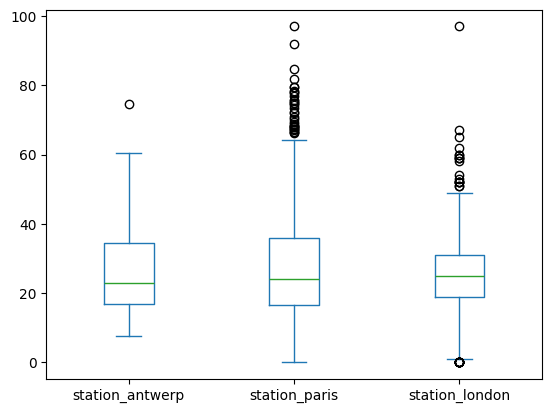

In [75]:
air_quality.plot.box()

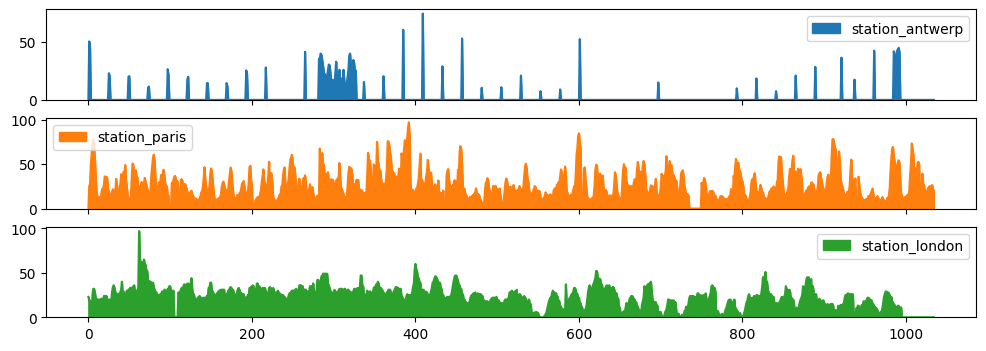

In [78]:
axs = air_quality.plot.area(figsize=(12,4),subplots=True)

Text(0, 0.5, 'NO$_2$ concentration')

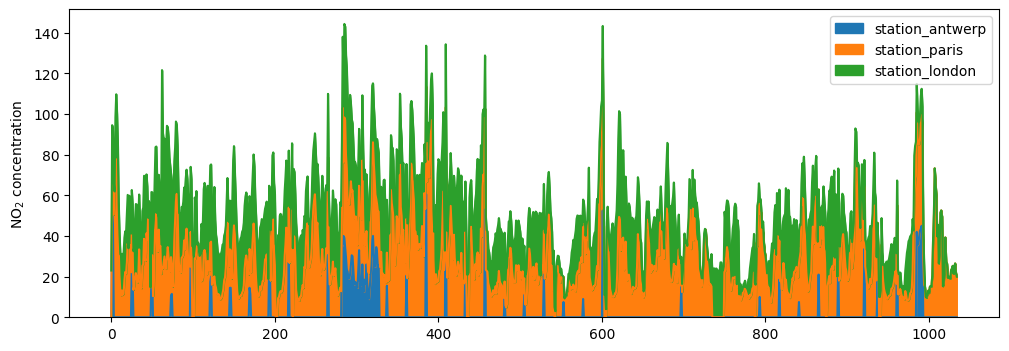

In [87]:
fig,axs = plt.subplots(figsize=(12,4))
air_quality.plot.area(ax=axs)
axs.set_ylabel("NO$_2$ concentration")


In [90]:
fig.savefig("./plots/no2_concentration.png")

In [71]:
plt.show()

### Create New Columns

In [ ]:
# index_col ის საშუალებით ვეუბნებით რომ ციფრების ნაცვლად ინდექსად გამოიყენოს პირველი column
# parse_dates მოწოდებულ მონაცემებში თუ არის თარიღები სტრინგის სახით ავტომატურად გადააქციოს date ტიპად
air_quality = pd.read_csv("./data/air_quality_no2.csv",index_col=0,parse_dates=True)

In [92]:
air_quality['london_mg_per_cubic'] = air_quality['station_london'] * 1.882

In [96]:
air_quality['ratio_paris_antwerp']=(air_quality['station_paris']/air_quality['station_antwerp'])

In [101]:
# ვაკეთებთ სახელების გადარქმევას rename მეთოდის საშუალებით რომელსაც გააჩნია პარამეტრი columns
# columns უნდა მიენიჭოს ობიექტი რომლის ელემენტებშიც key არის column-ის საწყისი სახელი
# value არის column-ის ახალი სახელი
air_quality_renamed = air_quality.rename(columns={
    "station_antwerp": "BETR801",
    "station_paris": "FR04014",
    "station_london": "London Westminster",
})

### Calculate summary statistics

In [8]:
titanic = pd.read_csv('./data/titanic.csv')

In [4]:
# საშუალო
titanic['Age'].mean()

np.float64(29.69911764705882)

In [6]:
titanic[['Age','Fare']].median()

Age     28.0000
Fare    14.4542
dtype: float64

In [ ]:
titanic[['Age','Fare']].describe()

In [ ]:
titanic.agg({
        "Age": ["min", "max", "median", "skew"],
        "Fare": ["min", "max", "median", "mean"],
    })

In [ ]:
# ვპოულობთ საშუალო ასაკს სქესის მიხედვით
# ქალების საშუალო ასაკი 27
# კაცების საშუალო ასაკი 30
titanic[['Sex','Age']].groupby('Sex').mean()

In [24]:
# გამოვითვალეთ ყველა column-ის საშუალო რომლის ტიპიც იყო ციფრი სქესის მიხედვით
# numeric_only ვუთითებთ რომ გამოითვალოს მხოლოდ იმ column-ების საშუალო რომლის ტიპიც არის ციფრი
titanic.groupby('Sex').mean(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [ ]:
# დავაჯგუფეთ DataFrame Sex და Pclass-ის მიხედვით და შემდეგ ვიპოვეთ Fare-ის საშუალო
# Sex და Pclass-ის მიხედვით
# თუ groupby-ში გადავცემთ list და შიგნით იქნება განთავსებული column-ების სახელები.
# ამ კონკრეტული column-ების მიხედვით დააჯგუფებს
titanic.groupby(['Sex','Pclass'])['Fare'].mean()

In [33]:
# დავითვალეთ თუ რომელი მნიშვნელობა რამდენჯერაა გამოყენებული
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64